# Python Basics with Numpy

## Buidling Basic function with numpy
- Numpy is the main package for scientific computing in Python. Several key numpy functions such as np.exp, np.log and np.reshape.
#### 1.1 Sigmoid function, np.exp()
- We will use math.exp() to implement the sigmoid function. We will then see why np.exp() is preferable to math.exp()
- 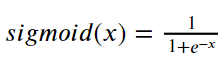 is also know as the logistic function. It is a non-linear function.
- 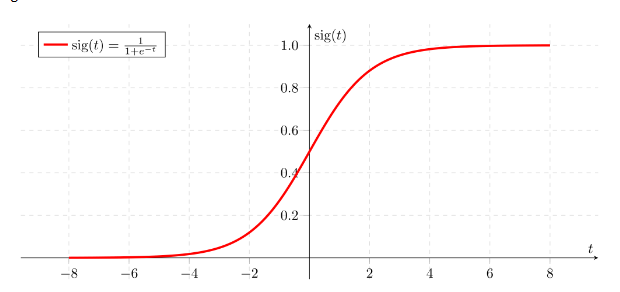

In [1]:
import math

def basic_sigmoid(x):
    '''
    Compute sigmoid of x
    
    Arguments:
    x : A scalar
    
    Returns
    s : sigmoid(x)
    '''
    
    s = 1/(1+math.exp(-x))
    return s

In [4]:
basic_sigmoid(1)

0.7310585786300049

- We rarely use the math.exp() because the inputs to the function are real numbers. In deep learning, we mostly use matrices and vectors. This is why numpy is more useful.

In [5]:
x = [1, 2, 3]
basic_sigmoid(x)

TypeError: bad operand type for unary -: 'list'

- If x = (x1, x2, x3,...xn) is a row vector then np.exp(x) will apply the exponential function to every element of x.

In [14]:
import numpy as np

t_x = np.array([1, 2, 3])
print(np.exp(t_x))

[ 2.71828183  7.3890561  20.08553692]


In [15]:
# Example of vector operation
t_x = np.array([1, 2, 3])
t_x+3

array([4, 5, 6])

## Sigmoid
- Implement the sigmoid function using numpy.
- x could now be either a real number, a vector or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices,...) are called numpy arrays.
- 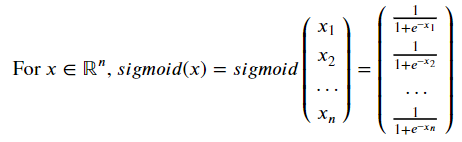


In [16]:
# Sigmoid fucntion

def sigmoid(x):
    '''
    Compute the sigmoid of x
    
    Arguments : 
    x : A scalar or numpy array of any size
    
    Returns:
    s : sigmoid(x)
    '''
    s = 1/(1+np.exp(-x))
    return s

In [17]:
t_x = np.array([1, 2, 3])
sigmoid(t_x)

array([0.73105858, 0.88079708, 0.95257413])

### Sigmoid Gradient
- We will need to compute gradients to optmize loss functions using backpropagation. 
#### Sigmoid_derivative
- Implement the function sigmoid_grad() to compute the gradient function with respect to its input x. The formula is
    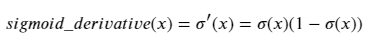

In [18]:
def sigmoid_derivative(x):
    '''
    Compute the gradient (slope or derivative) of the sigmoid function with respect to its input x.
    We can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x : A scalar or numpy array
    
    Returns:
    ds : Our computed gradient
    '''
    
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [19]:
t_x = np.array([1, 2, 3])
sigmoid_derivative(t_x)

array([0.19661193, 0.10499359, 0.04517666])

### Reshaping Arrays
- Two common numpy functions used in deep learning are np.shape and np.reshape()
    - X.shape is used to get the shape (dimension) of a matrix/vector X.
    - X.reshape() is used to reshape X into some other dimension.
- An image is represented by a 3D array of shape (length, height, depth=3). However, when we read an image as the input of an algorithm we convert it to a vector of shape (length*height*3, 1). In other words, we unroll or reshape the 3D array into a 1D vector.
- 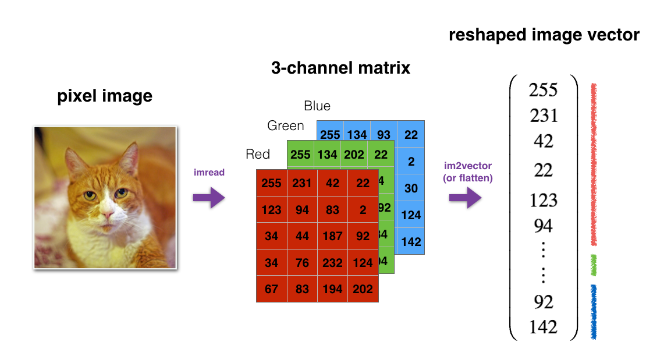

In [22]:
def image2vector(image):
    '''
    Arguments:
    image : A numpy array of shape (length, height, depth)
    
    Returns:
    v : A vector of shape (length*height*depth, 1)
    '''
    
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2], 1))
    return v

In [23]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
t_image = np.array([[[ 0.67826139,  0.29380381],
                     [ 0.90714982,  0.52835647],
                     [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]])

image2vector(t_image)

array([[0.67826139],
       [0.29380381],
       [0.90714982],
       [0.52835647],
       [0.4215251 ],
       [0.45017551],
       [0.92814219],
       [0.96677647],
       [0.85304703],
       [0.52351845],
       [0.19981397],
       [0.27417313],
       [0.60659855],
       [0.00533165],
       [0.10820313],
       [0.49978937],
       [0.34144279],
       [0.94630077]])

## Normalizing rows
- Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. By normalization we mean changing x to x/|x| (dividing each row vector x by its norm)
- 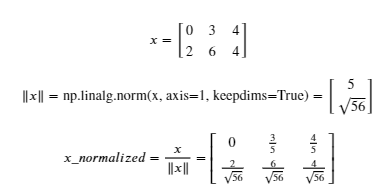
- With keepdims=True the result will broadcast correctly aganist the original x.
- numpy.linalg.norm has another parameter ord where we specify the type of normalization to be done.

In [24]:
def normalize_rows(x):
    '''
    Implement a function that normalizes each row of the matrix x (to have unit length)
    
    Argument:
    x : The normalized (by rows) numpy matrix.
    '''
    
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    x = x/x_norm
    return x

In [27]:
x = np.array([[0., 3., 4.],
              [1., 6., 4.]])
normalize_rows(x)

array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

### Softmax
- Implement a softmax function using numpy. We can think softmax as a normalizing function used when our algorithm needs to classify 2 or more classes. 
- 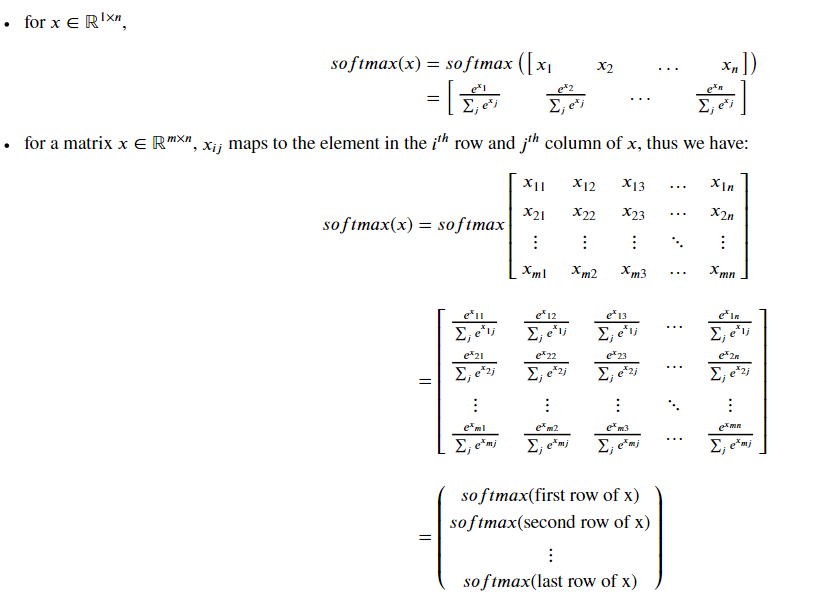
- Softmax should be performed for all features of each training example. So softmax would be performed on the columns.

In [30]:
def softmax(x):
    '''
    Calculates the softmax for each row of the input x.
    
    Argument:
        x : A numpy matric of shape (m, n)
        
    Returns:
        S : A numpy matrix equal to the softmax of x, of shape (m, n)
    '''
    
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp/x_sum
    
    return s
    

In [31]:
t_x = np.array([[9, 2, 5, 0, 0],
                [7, 5, 0, 0 ,0]])
softmax(t_x)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])

#### Summary
- np.exp(x) works for any np.array x and applies the exponential function to every coordinate
- The sigmoid function and its gradient
- image2vector is commly used in deep learning.
- np.reshape is widely used. 
- numpy has efficeint built-in functions.
- broadcasting is extremly useful.

## Vectorization
- In deep learning, we deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in our algorithm and can result in a model that takes ages to run. To make sure that our code is computationally efficient, we will use vectorization.

### Implement the L1 and L2 loss function
- The loss if used to evaluate the performance of our model. The bigger our loss is, the more different our predictions (y_hat) are from the true value(y).
- We use optimization algorithms like gradient descent to train our model and to minimize the ocst.
- L1 loss is defined as : 
    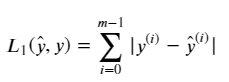

In [36]:
def L1(yhat, y):
    '''
    Arguments:
        yhat : Vector of size m (predicted labels)
        y : vector of size m (true labels)
        
    Returns:
        loss : The value of the L1 loss functi
    '''
    
    loss = np.sum(abs(yhat-y))
    return loss

In [37]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
L1(yhat, y)

1.1

- There are several ways of implementing L2 loss but we may find the function np.dot().
- L2 loss is defined as 
    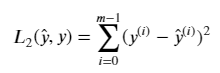

In [38]:
def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """

#     loss = np.sum((yhat-y)**2)
    loss = np.sum(np.dot(yhat-y, yhat-y))
    
    return loss

In [39]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

L2(yhat, y)

0.43

In [3]:
y = np.array([1, 0, 0, 1, 1])
yT

<IPython.core.display.Javascript object>

NameError: name 'yT' is not defined